#Preparación de datos

Let's clsasify using Random Forest

## Importar librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ChurnData.csv")

##Explorar

In [ ]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [ ]:
df.shape

(200, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

Queremos que la columna objetivo (churn) sea entera y no flotante

In [ ]:
df['churn'] = df['churn'].astype('int')

##EDA

<Axes: >

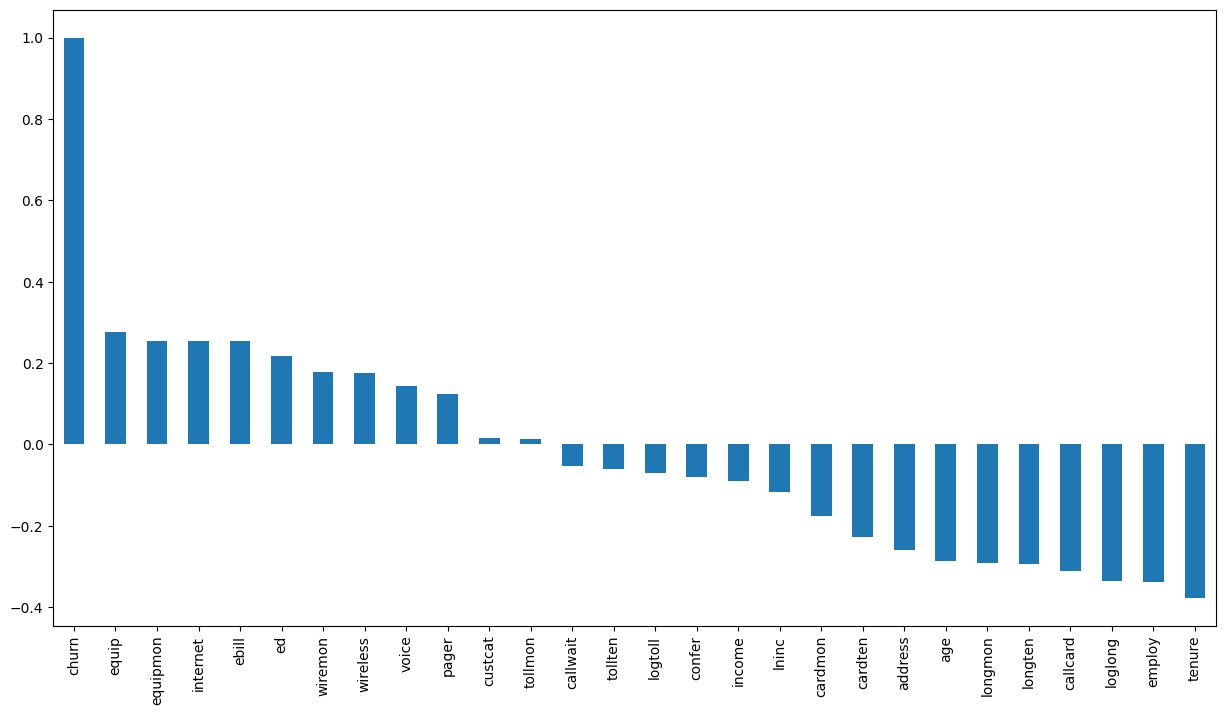

In [ ]:
plt.figure(figsize=(15,8))
df.corr()['churn'].sort_values(ascending=False).plot(kind='bar')

### Los atributos de correlación positiva favorecen a que la persona se vaya; contrario pasa con correlación negativa.

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(df, x='churn', color="ed",barmode="group",title="<b>Churn distribution w.r.t. Ed</b>")
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

### Ahora haremos una distribución de densidad entre personas que se fueron y se quedaron

In [ ]:
import seaborn as sns

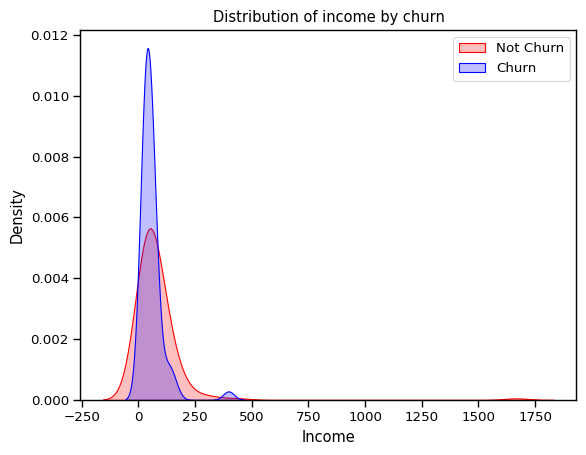

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.income[(df["churn"] == 0)],
                 color="Red",fill=True);
ax = sns.kdeplot(df.income[(df["churn"] == 1)],
                 ax=ax,color="Blue",fill=True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Income')
ax.set_title('Distribution of income by churn');

In [ ]:
fig = px.box(df,x='churn',y='tenure')
fig.update_yaxes(title_text='Tenure (Months)',row=1,col=1)
fig.update_xaxes(title_text='Churn',row=1,col=1)
fig.update_layout(autosize=True,width=750,height=600,
                  title_font=dict(size=25,family='Courier'),
                  title='<b>Tenure vs Churn</b>',
)
fig.show()

# Construir el modelo

##División del dataset

In [ ]:
X = df[['tenure','age','address','income','ed','employ','equip']]
y= df['churn']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=40)

##Baseline model

Contrary to its name, Logistic Regression is a classification algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train,y_train)

## Evaluación del modelo

In [ ]:
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
yhat = model.predict(X_test)
accuracy_lr = model.score(X_test,y_test)
print("Logistic regression accuracy is: ",accuracy_lr)

Logistic regression accuracy is:  0.6833333333333333


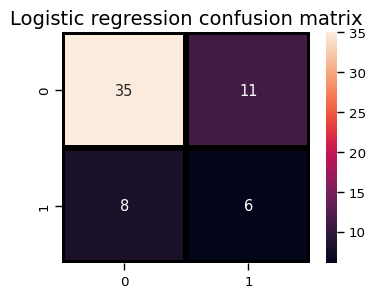

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,yhat),
            annot=True,fmt='d',linecolor='k',linewidths=3)
plt.title("Logistic regression confusion matrix",fontsize=14)
plt.show()

In [ ]:
report = classification_report(y_test,yhat)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        46
           1       0.35      0.43      0.39        14

    accuracy                           0.68        60
   macro avg       0.58      0.59      0.59        60
weighted avg       0.71      0.68      0.69        60



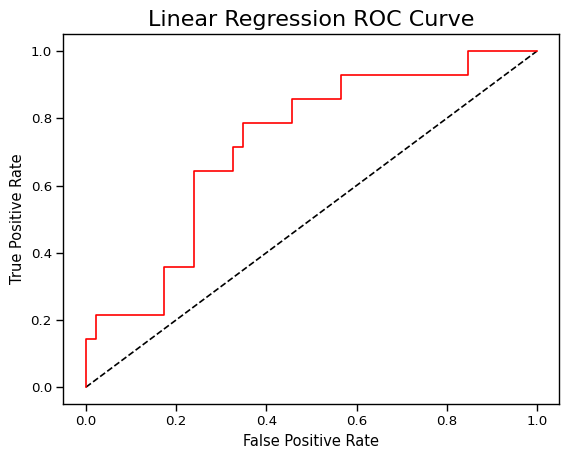

In [ ]:
from sklearn.metrics import roc_curve
y_rfpred_prob=model.predict_proba(X_test)[:,1]
fpr_rf,tpr_rf,thresholds = roc_curve(y_test,y_rfpred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf,label='Linear Regression',color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Regression ROC Curve',fontsize=16)
plt.show();


# Comunicar resultados

In [ ]:
yhat_prob = model.predict_proba(X_test)


Axes(0.125,0.11;0.775x0.77)


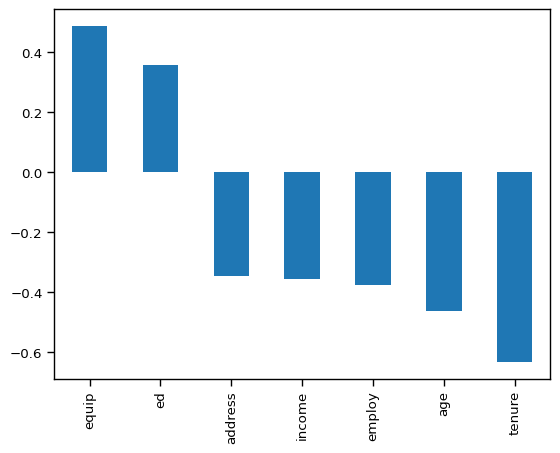

In [ ]:
weights = pd.Series(model.coef_[0],index=['tenure','age','address','income','ed','employ','equip'])
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100,oob_score=True,n_jobs=-1,
                                  random_state=50,
                                  max_leaf_nodes=30)
model_rf.fit(X_train,y_train)
prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test))

0.7333333333333333
